In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [ ]:
df = pd.read_csv('/content/BorsnTav4BrulorAtikGz.csv')
df.head()


,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-08-25 12:55:00,0.0,0.0000,0.0000,31.51934,2.77160,NaN
1,2022-08-25 13:00:00,0.0,0.0000,0.0000,31.68508,2.37825,NaN
2,2022-08-25 13:05:00,0.0,0.0000,0.0000,31.40884,2.43790,NaN
3,2022-08-25 13:10:00,0.0,0.0942,0.0000,31.29834,2.95775,NaN
4,2022-08-25 13:15:00,0.0,0.0000,0.1332,31.13260,2.56905,NaN


In [ ]:
df = pd.read_csv('/content/Erknt1GZBzm.csv')
df.head()
df.tail()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
23672,2023-04-24 21:10:00,9.22867,4.45533,7.40361,47.96133,NaN,2.96339
23673,2023-04-24 21:15:00,9.27186,4.53187,7.46542,48.77901,NaN,2.78764
23674,2023-04-24 21:20:00,9.19269,4.46629,7.44192,49.12523,NaN,2.76883
23675,2023-04-24 21:25:00,9.28891,4.52090,7.41436,49.22652,NaN,2.88282
23676,2023-04-24 21:30:00,9.25566,4.46503,7.38514,49.19890,NaN,2.96794


In [2]:
df = pd.read_csv('/content/OyknkrIDFanThrk.csv')
df.head()
df.tail()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
80704,2023-04-24 21:10:00,2.13168,3.45306,2.03945,35.38674,NaN,2.55473
80705,2023-04-24 21:15:00,2.13721,3.50208,2.03579,36.18232,NaN,2.72925
80706,2023-04-24 21:20:00,2.15311,3.53164,2.03314,35.29834,NaN,2.54661
80707,2023-04-24 21:25:00,2.13789,3.42069,2.03651,35.78453,NaN,2.61861
80708,2023-04-24 21:30:00,2.12669,3.39449,2.03415,36.46409,NaN,2.60824


In [ ]:
df = pd.read_csv('/content/OykBlFarnSstmFn.csv')
df.head()
df.tail()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
84537,2023-04-24 21:25:00,4.49352,1.29751,0.55253,36.40331,NaN,2.59193
84538,2023-04-24 21:30:00,4.53100,1.29188,0.54812,37.02210,NaN,2.54949
84539,2022-07-11 22:30:00,2.69700,1.54000,0.42800,NaN,NaN,NaN
84540,2022-07-27 13:15:00,3.35100,1.69700,0.42000,NaN,NaN,NaN
84541,2022-07-29 02:45:00,3.36600,1.65900,0.53200,NaN,NaN,NaN


In [ ]:
df.tail()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
80704,2023-04-24 21:10:00,2.13168,3.45306,2.03945,35.38674,NaN,2.55473
80705,2023-04-24 21:15:00,2.13721,3.50208,2.03579,36.18232,NaN,2.72925
80706,2023-04-24 21:20:00,2.15311,3.53164,2.03314,35.29834,NaN,2.54661
80707,2023-04-24 21:25:00,2.13789,3.42069,2.03651,35.78453,NaN,2.61861
80708,2023-04-24 21:30:00,2.12669,3.39449,2.03415,36.46409,NaN,2.60824


In [3]:
df.fillna(0,inplace=True)
df.tail()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
80704,2023-04-24 21:10:00,2.13168,3.45306,2.03945,35.38674,0.0,2.55473
80705,2023-04-24 21:15:00,2.13721,3.50208,2.03579,36.18232,0.0,2.72925
80706,2023-04-24 21:20:00,2.15311,3.53164,2.03314,35.29834,0.0,2.54661
80707,2023-04-24 21:25:00,2.13789,3.42069,2.03651,35.78453,0.0,2.61861
80708,2023-04-24 21:30:00,2.12669,3.39449,2.03415,36.46409,0.0,2.60824


In [4]:
df["newcf"]=df["cf"]+df["maxCf"]
df.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf,newcf
0,2022-06-26 21:35:00,1.90720,2.3100,3.0294,39.040,2.5680,0.0,2.5680
1,2022-06-26 21:40:00,1.98175,2.3430,2.9805,39.075,2.5825,0.0,2.5825
2,2022-06-26 21:45:00,1.93160,2.2764,2.9022,38.820,2.4740,0.0,2.4740
3,2022-06-26 21:50:00,1.96960,2.2898,2.8430,38.180,2.5080,0.0,2.5080
4,2022-06-26 21:55:00,1.95120,2.2580,2.8106,37.780,2.5140,0.0,2.5140


In [5]:
del df['maxCf']
del df["cf"]

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index(df["time"].name)
df.head()

,xVRMS,yVRMS,zVRMS,temp,newcf
time,,,,,
2022-06-26 21:35:00,1.90720,2.3100,3.0294,39.040,2.5680
2022-06-26 21:40:00,1.98175,2.3430,2.9805,39.075,2.5825
2022-06-26 21:45:00,1.93160,2.2764,2.9022,38.820,2.4740
2022-06-26 21:50:00,1.96960,2.2898,2.8430,38.180,2.5080
2022-06-26 21:55:00,1.95120,2.2580,2.8106,37.780,2.5140


In [ ]:
df.index.name

'time'

In [ ]:
start_date = '2022-06-27 11:35:00'
end_date = '2022-06-27 12:00:00'
selected_data = df.loc[start_date:end_date]

In [ ]:
df = df.drop(selected_data.index)


In [ ]:
df.head()

,xVRMS,yVRMS,zVRMS,temp,newcf
time,,,,,
2023-01-11 10:55:00,0.04440,0.03995,0.03295,23.20,2.55005
2023-01-11 11:00:00,0.04130,0.04090,0.03230,23.10,2.38270
2023-01-11 11:05:00,0.04355,0.04410,0.03335,23.20,2.52870
2023-01-11 11:10:00,0.03945,0.03810,0.03380,23.25,2.59055
2023-01-11 11:15:00,0.04170,0.03610,0.03750,23.40,2.29500


In [ ]:
fft = np.fft.fft(df['xVRMS'].values)
fft

array([138696.52161   +1.31095135e-12j,   3308.19265196-1.76664477e+04j,
         8402.61178246-3.46430574e+04j, ...,
        -8322.53189332+2.60957507e+03j,   8402.61178246+3.46430574e+04j,
         3308.19265196+1.76664477e+04j])

In [ ]:
n = len(fft)
amplitudes = 2.0/n * np.abs(fft[:n//2])
frequencies = np.fft.fftfreq(n, 1/12)[:n//2]

for i in range(10):
    print(f'Amplitude: {amplitudes[i]:.2f}, Frequency: {frequencies[i]:.2f}')


Amplitude: 3.44, Frequency: 0.00
Amplitude: 0.45, Frequency: 0.00
Amplitude: 0.88, Frequency: 0.00
Amplitude: 0.22, Frequency: 0.00
Amplitude: 0.67, Frequency: 0.00
Amplitude: 0.20, Frequency: 0.00
Amplitude: 0.23, Frequency: 0.00
Amplitude: 0.35, Frequency: 0.00
Amplitude: 0.22, Frequency: 0.00
Amplitude: 0.29, Frequency: 0.00


In [ ]:
dates = pd.date_range(start='2010-01-01', end='2020-12-31', freq='MS')
data = np.sin(np.arange(len(dates)) * (2 * np.pi / 12)) * 10 + np.random.randn(len(dates))
df2 = pd.DataFrame({'date': dates, 'temperature': data})
df2.head()

,date,temperature
0,2010-01-01,0.317484
1,2010-02-01,4.820503
2,2010-03-01,9.552978
3,2010-04-01,8.456058
4,2010-05-01,9.346088


In [ ]:
len(df2)

132

In [ ]:
fft = np.fft.fft(df['xVRMS'].values)


İlk önce, "df['temp'].values" ifadesi kullanılarak "temp" sütununun değerleri NumPy dizisi olarak alınır. Sonra, "np.fft.fft" fonksiyonu kullanılarak FFT işlemi uygulanır ve sonuç bir NumPy dizisi olarak "fft" değişkenine atanır.

FFT, bir zaman serisinin frekans bileşenlerine ayrıştırılmasını sağlayan bir matematiksel işlemdir. Bu işlem, sinyallerin frekans analizinde ve dijital işaret işlemede yaygın olarak kullanılır.

In [ ]:
n = len(fft)
amplitudes = 2.0/n * np.abs(fft[:n//2])
frequencies = np.fft.fftfreq(n, 1/12)[:n//2]

for i in range(10):
    print(f'Amplitude: {amplitudes[i]:.2f}, Frequency: {frequencies[i]:.2f}')


Amplitude: 3.44, Frequency: 0.00
Amplitude: 0.45, Frequency: 0.00
Amplitude: 0.88, Frequency: 0.00
Amplitude: 0.22, Frequency: 0.00
Amplitude: 0.67, Frequency: 0.00
Amplitude: 0.20, Frequency: 0.00
Amplitude: 0.23, Frequency: 0.00
Amplitude: 0.35, Frequency: 0.00
Amplitude: 0.22, Frequency: 0.00
Amplitude: 0.29, Frequency: 0.00


Bu kodlar, NumPy kütüphanesi kullanılarak hesaplanan FFT sonucu üzerinde işlem yapar ve ilk 10 frekans bileşeninin genliğini ve frekansını yazdırır.

İlk satırda, FFT sonucunun uzunluğu "n" değişkenine atanır.

İkinci satırda, FFT sonucunun genlik bileşenlerini hesaplamak için önce FFT sonucunun yarısından önceki bölümü (yani, pozitif frekans bileşenleri) "np.abs" fonksiyonu kullanılarak mutlak değerleri alınır. Genlik bileşenleri, FFT sonucundaki her bir frekans bileşeninin büyüklüğünü belirtir. Çarpan "2.0/n" kullanılarak, genlik bileşenleri normalleştirilir.

Üçüncü satırda, FFT sonucundaki frekans bileşenlerinin frekanslarını hesaplamak için "np.fft.fftfreq" fonksiyonu kullanılır. Bu fonksiyon, FFT sonucunun uzunluğunu ve örnekleme aralığını alır ve her bir frekans bileşeninin frekansını hesaplar. Çarpan "[:n//2]" kullanılarak, yine sadece pozitif frekans bileşenleri alınır.

Son olarak, "for" döngüsü kullanılarak ilk 10 frekans bileşeninin genliklerini ve frekanslarını yazdırmak için "amplitudes" ve "frequencies" değişkenleri kullanılır. "f'{değişken:.2f}'" kullanılarak, sayıların iki ondalık basamağa yuvarlanarak yazdırılması sağlanır.

In [ ]:
# Amplitude threshold for removing low amplitude components
threshold = 1.5
# Maximum number of components to use for reconstruction
max_components = 5

fft_components = pd.DataFrame()

for i in range(n):
    amplitude = 2.0/n * np.abs(fft[i])
    if amplitude > threshold:
        frequency = np.fft.fftfreq(n, 1/12)[i]
        phase = np.angle(fft[i])
        component = amplitude * np.cos(2*np.pi*frequency*np.arange(n) + phase)
        fft_components[f'component_{i}'] = component
        
        if len(fft_components.columns) // 2 == max_components:
            break

df = pd.concat([df, fft_components], axis=1)


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df['time'], df['temp'], label='Original Data')

for i in range(1, len(fft_components.columns), 2):
    component = fft_components.iloc[:, i]
    ax.plot(df['time'], component, label=f'Component {i//2}')

ax.legend()
plt.show()



KeyboardInterrupt: ignored

Bu kod, FFT sonucundaki frekans bileşenlerinin genliği ve fazı kullanılarak, sadece belirli bir genlik eşiği üzerindeki bileşenleri seçerek, orijinal zaman serisini yeniden oluşturan bileşenleri hesaplar.

İlk satırda, "threshold" değişkeni kullanılarak, yeniden oluşturulacak bileşenlerin genliğinin en az ne kadar olması gerektiği belirlenir.

İkinci satırda, "max_components" değişkeni kullanılarak, yeniden oluşturulacak maksimum bileşen sayısı belirlenir.

Üçüncü satırda, bir boş Pandas DataFrame olan "fft_components" tanımlanır. Bu DataFrame, yeniden oluşturulacak bileşenleri depolamak için kullanılır.

Döngüde, FFT sonucundaki her bir bileşenin genliği hesaplanır ve "threshold" değişkeninden büyükse, o bileşenin frekansı, fazı ve genliği kullanılarak yeniden oluşturulacak bileşen hesaplanır. "np.angle" fonksiyonu kullanılarak, bileşenin fazı alınır. Sonra, "np.cos" fonksiyonu kullanılarak, bileşenin genliği, frekansı ve fazı ile çarpılır ve zaman dizisi boyunca döngülenir. Her bileşen, "fft_components" DataFrame'e eklenir.

Döngü, "max_components" değişkeninde belirlenen sayıya ulaştığında sonlandırılır.

Son olarak, "pd.concat" fonksiyonu kullanılarak, "df" DataFrame'i ve "fft_components" DataFrame'i birleştirilir ve yeni DataFrame, yeniden oluşturulmuş zaman serisini içerir. Böylece, orijinal zaman serisi, sadece belirli frekans bileşenleri kullanılarak yeniden oluşturulur.

In [ ]:
def has_seasonality(df):
    fft = np.fft.fft(df['temp'].values)
    n = len(fft)
    amplitudes = 2.0 / n * np.abs(fft[:n // 2])
    frequencies = np.fft.fftfreq(n, 1 / 12)[:n // 2]

   
    max_amplitude_index = np.argmax(amplitudes[1:]) + 1
    max_amplitude_frequency = frequencies[max_amplitude_index]


    if np.isclose(max_amplitude_frequency, 0) or np.isclose(max_amplitude_frequency, 0.5):
        return False

    else:
        return True


Bu kod, bir zaman serisinde mevsimsellik olup olmadığını belirlemek için Fourier analizini kullanır. İlk önce verilerin Fourier dönüşümü hesaplanır ve bunun sonucunda, her frekans bileşeni için bir genlik değeri hesaplanır. Genlikler, sadece pozitif frekans bileşenlerine (0'dan n / 2'ye kadar) odaklanılarak hesaplanır. Ardından, en büyük genlik değeri olan bileşenin frekansı bulunur ve bu frekansın 0 veya 0.5'e yakın olup olmadığına bakarak mevsimsellik olup olmadığı belirlenir. Eğer frekans 0 veya 0.5'e yakınsa, mevsimsellik yoktur ve False döndürülür. Aksi takdirde, mevsimsellik vardır ve True döndürülür.

In [ ]:
has_seasonality(df)

True

In [ ]:
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adfuller_test(series, signif=0.05):
    adf_result = adfuller(series, autolag='AIC')
    output = {
        'Test Statistic': adf_result[0],
        'P-value': adf_result[1],
        'Number of Lags': adf_result[2],
        'Number of Observations': adf_result[3],
        f'Reject Null Hypothesis (significance level {signif})': adf_result[1] < signif
    }
    for key, val in adf_result[4].items():
        output[f'Critical Value ({key})'] = val
    return pd.Series(output)

def adf_test_for_all_columns(df, signif=0.05):
    adf_test_results = pd.DataFrame()
    for column_name in df.columns:
        adf_test_results[column_name] = adfuller_test(df[column_name], signif)
    return adf_test_results

# Örnek kullanım:
adf_results = adf_test_for_all_columns(df[["xVRMS"]])
adf_results

,xVRMS
Test Statistic,-8.86935
P-value,0.0
Number of Lags,64
Number of Observations,80644
Reject Null Hypothesis (significance level 0.05),True
Critical Value (1%),-3.430431
Critical Value (5%),-2.861576
Critical Value (10%),-2.566789


Bu tablo, bir veri dizisinin (muhtemelen zaman serisi verisi) üstünde bir Dickey-Fuller birim kök testi (ADF) yapıldığında elde edilen sonuçları göstermektedir.

ADF testi, bir zaman serisinin istasyonersizlik özelliklerini kontrol etmek için kullanılır. Bu test, bir zaman serisinin kökünün birim olup olmadığını kontrol eder ve bir zaman serisi birim köke sahipse, seride zamanla birlikte artan bir varyans veya trend olduğu sonucuna varır. Bu, istatistiksel modellerin uygulanması için gereken bir özelliktir.

Tabloda, "Test İstatistiği" adlı bir kriter yer almaktadır. Bu kriter, test sonucunu temsil eder ve birim kökün varlığına dair bir tür ölçüdür. Eğer test istatistiği, kritik değerlerin altında olursa, birim kökün varlığı hipotezi reddedilir ve seri istasyonersizdir.

"P-value" ise, hipotez testindeki p değerini gösterir. Eğer p değeri, belirlenen önem düzeyinin altında ise, birim kökün varlığı hipotezi reddedilir ve seri istasyonersizdir.

"Number of Lags" ise, testin lag değeridir. Bu değer, veri dizisi içerisindeki bağımsız gözlemlerin sayısıdır.

"Number of Observations", testte kullanılan gözlem sayısıdır.

"Reject Null Hypothesis (significance level 0.05)" sütunu, hipotezin reddedilip reddedilmediğini gösterir. Belirli bir önem düzeyinde hipotez reddedildiyse "True" değeri döner.

"Critical Value" sütunları, belirli bir önem düzeyindeki kritik değerleri gösterir. Eğer test istatistiği bu kritik değerlerin altında olursa, birim kökün varlığı hipotezi reddedilir ve seri istasyonersizdir.





- sonuca göre test istatistiği (Test Statistic) -6.448792 ve p-değeri (P-value) 0.0 olarak hesaplanmıştır. Bu sonuçlar, nedenin rasgele varyasyon olmadığına ve mevsimsel bir etkisinin olduğuna işaret eder. Ayrıca, "Reject Null Hypothesis (significance level 0.05)" sütunu True olarak verilmiştir, yani mevsimsel bir etki olduğu anlamına gelir. Bu nedenle, sonuçlara göre, verilerde mevsimsellik var.

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adfuller_test(series, signif=0.05):
    adf_result = adfuller(series, autolag='AIC')
    output = {
        'Test Statistic': adf_result[0],
        'P-value': adf_result[1],
        'Number of Lags': adf_result[2],
        'Number of Observations': adf_result[3],
        f'Reject Null Hypothesis (significance level {signif})': adf_result[1] < signif
    }
    for key, val in adf_result[4].items():
        output[f'Critical Value ({key})'] = val
    return pd.Series(output)
"""
def adf_test_for_all_columns(df, signif=0.05):
    adf_test_results = pd.DataFrame()
    for column_name in df.columns:
        adf_test_results[column_name] = adfuller_test(df[column_name], signif)
    return adf_test_results
"""
def adf_test_for_all_columns(df, signif=0.05):
    if isinstance(df, pd.Series):
        df = df.to_frame()
    adf_test_results = pd.DataFrame()
    for column_name in df.columns:
        adf_test_results[column_name] = adfuller_test(df[column_name], signif)
    return adf_test_results

# Örnek kullanım:
adf_results = adf_test_for_all_columns(df["temp"])
adf_results

,temp
Test Statistic,-6.448792
P-value,0.0
Number of Lags,24
Number of Observations,23652
Reject Null Hypothesis (significance level 0.05),True
Critical Value (1%),-3.430627
Critical Value (5%),-2.861662
Critical Value (10%),-2.566835


In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF testini uygulama
result = adfuller(df["xVRMS"])

In [ ]:
def adf_test_for_all_columns(df, signif=0.05):
    if isinstance(df, pd.Series):
        df = df.to_frame()
    adf_test_results = pd.DataFrame()
    for column_name in df.columns:
        adf_test_results[column_name] = adfuller_test(df[column_name], signif)
    return adf_test_results

In [ ]:
result

(-8.869350180844316,
 1.4117729910335164e-14,
 64,
 80644,
 {'1%': -3.430431091068915,
  '5%': -2.8615758408872147,
  '10%': -2.566789076866625},
 -29309.707146128494)

In [ ]:
def clean_limit(df_column, up_limit, low_limit):
    for i in range(len(df_column)):
        if df_column[i] < low_limit or df_column[i] > up_limit:
            print(f"Outlier value at index {i}")
            df_column.drop(i)

In [ ]:
def clean_limit(df_column,  low_limit):
  for i in range(len(df_column)):
      if df_column[i] < low_limit:
          #print(f"Outlier value at index {i}")
          df_column.drop(i,inplace=True)
  return df_column

In [ ]:
new_column=clean_limit(df["xVRMS"],0.3)

In [ ]:
len(new_column)

69957

In [ ]:
len(df['xVRMS'])

80709

In [ ]:
# ADF testini uygulama
result2 = adfuller(new_column)
result2

(-9.861526303793747,
 4.2206072729127625e-17,
 62,
 69894,
 {'1%': -3.4304435636847215,
  '5%': -2.8615813534865033,
  '10%': -2.5667920110480074},
 -16261.40732505094)

In [ ]:
(-8.869350180844316,
 1.4117729910335164e-14,
 64,
 80644,
 {'1%': -3.430431091068915,
  '5%': -2.8615758408872147,
  '10%': -2.566789076866625},
 -29309.707146128494)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Phillips-Perron-main')

In [ ]:
import ppclass

result = ppclass.pp(new_column)

AttributeError: ignored

# day3

In [1]:
df = pd.read_csv('/content/OyknkrIDFanThrk.csv')
df.head()

NameError: name 'pd' is not defined

In [5]:
df = pd.read_csv(r"C:\Users\denem\Downloads\EsnDegrmn1mtronrlmn.csv")
df.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-06-26 21:35:00,7.53931,4.94363,2.89816,48.95334,3.84012,NaN
1,2022-06-26 21:40:00,7.36773,4.82611,2.85156,49.05156,4.20228,NaN
2,2022-06-26 21:45:00,7.18102,4.84723,2.85830,48.84285,4.10223,NaN
3,2022-06-26 21:50:00,7.28957,4.86776,2.87858,48.89196,4.06978,NaN
4,2022-06-26 21:55:00,7.10303,4.77624,2.82860,48.79374,4.06219,NaN


In [6]:
!pip install scikit-learn

In [3]:
def clean_on_off(process_column, time_column, on_threshold, off_threshold):
    time_column = pd.to_datetime(time_column)
    process_column = process_column.set_index(time_column.name)
    selected_data = process_column.loc[on_threshold:off_threshold]
    process_column = process_column.drop(selected_data.index)
    return process_column

In [4]:
def fill_nan(df):  # tests for seasonality analysis should not have a nan value
    df.fillna(0, inplace=True)
    df["newcf"] = df["cf"] + df["maxCf"]
    del df['maxCf']
    del df["cf"]
    return df


In [5]:

def adfuller_test(series, signif=0.05):  # ADF (Augmented Dickey-Fuller)
    adf_result = adfuller(series, autolag='AIC')
    output = {
        'Test Statistic': adf_result[0],
        'P-value': adf_result[1],
        'Number of Lags': adf_result[2],
        'Number of Observations': adf_result[3],
        f'Reject Null Hypothesis (significance level {signif})': adf_result[1] < signif
    }
    for key, val in adf_result[4].items():
        output[f'Critical Value ({key})'] = val
    return pd.Series(output)

In [6]:
def adf_test_for_all_columns(df, signif=0.05):
    adf_test_results = pd.DataFrame()
    for column_name in df.columns:
        adf_test_results[column_name] = adfuller_test(df[column_name], signif)
    return adf_test_results


# adf_results = adf_test_for_all_columns(df[["temp"]])
# print(adf_results)
# clean_on_off(process_clm,time_column, on_threshold, off_threshold)
# clean_limit(process_clm, up_limit, low_limit)

In [42]:
def fourier_analysis(df):  # Fourier analysis can be used to identify regularly
    # recurring patterns in a time series,such as seasonality.
    fft = np.fft.fft(df['temp'].values)
    n = len(fft)
    amplitudes = 2.0 / n * np.abs(fft[:n // 2])
    frequencies = np.fft.fftfreq(n, 1 / 12)[:n // 2]

    for i in range(10):
        print(f'Amplitude: {amplitudes[i]:.2f}, Frequency: {frequencies[i]:.2f}')
    # Amplitude threshold for removing low amplitude components
    threshold = 1.5
    # Maximum number of components to use for reconstruction
    max_components = 5

    fft_components = pd.DataFrame()

    for i in range(n):
        amplitude = 2.0 / n * np.abs(fft[i])
        if amplitude > threshold:
            frequency = np.fft.fftfreq(n, 1 / 12)[i]
            phase = np.angle(fft[i])
            component = amplitude * np.cos(2 * np.pi * frequency * np.arange(n) + phase)
            fft_components[f'component_{i}'] = component

            if len(fft_components.columns) // 2 == max_components:
                break

    df = pd.concat([df, fft_components], axis=1)
    fig, ax = plt.subplots(figsize=(15, 5))

    ax.plot(df['time'], df['temp'], label='Original Data')

    for i in range(1, len(fft_components.columns), 2):
        component = fft_components.iloc[:, i]
        ax.plot(df['time'], component, label=f'Component {i // 2}')

    ax.legend()
    plt.show()

In [7]:
def has_seasonality(df):  # fft but only true or false
    fft = np.fft.fft(df['temp'].values)
    n = len(fft)
    amplitudes = 2.0 / n * np.abs(fft[:n // 2])
    frequencies = np.fft.fftfreq(n, 1 / 12)[:n // 2]

    max_amplitude_index = np.argmax(amplitudes[1:]) + 1
    max_amplitude_frequency = frequencies[max_amplitude_index]

    if np.isclose(max_amplitude_frequency, 0) or np.isclose(max_amplitude_frequency, 0.5):
        return False

    else:
        return True

In [8]:
fill_nan(df)
df.isnull().sum()

time     0
xVRMS    0
yVRMS    0
zVRMS    0
temp     0
newcf    0
dtype: int64

In [11]:
process_clm = df["xVRMS"]
time_column = df["time"]
process_clm_mean = process_clm.mean()
process_clm_std = process_clm.std()

up_limit = process_clm_mean + 3 * process_clm_std
low_limit = process_clm_mean - 3 * process_clm_std

In [12]:
process_clm_mean,process_clm_std,up_limit,low_limit

(3.8301980410111236,
 2.428239187225797,
 11.114915602688516,
 -3.4545195206662678)

In [13]:
df["time"]=pd.to_datetime(df["time"])

In [14]:
df=df.set_index(df["time"])

In [15]:
df.head()

,time,xVRMS,yVRMS,zVRMS,temp,newcf
time,,,,,,
2022-06-26 21:35:00,2022-06-26 21:35:00,7.53931,4.94363,2.89816,48.95334,3.84012
2022-06-26 21:40:00,2022-06-26 21:40:00,7.36773,4.82611,2.85156,49.05156,4.20228
2022-06-26 21:45:00,2022-06-26 21:45:00,7.18102,4.84723,2.85830,48.84285,4.10223
2022-06-26 21:50:00,2022-06-26 21:50:00,7.28957,4.86776,2.87858,48.89196,4.06978
2022-06-26 21:55:00,2022-06-26 21:55:00,7.10303,4.77624,2.82860,48.79374,4.06219


In [67]:
df["xVRMS"].head()

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [19]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        return filtered
    else:
        filtered = df_column[(df_column >= low_limit) & (df_column <= up_limit)]
        return filtered



In [177]:
new_x = clean_limit(df["xVRMS"],low_limit= 0.3)
new_x.head()


time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [71]:
type(new_x)

pandas.core.series.Series

<Axes: xlabel='time'>

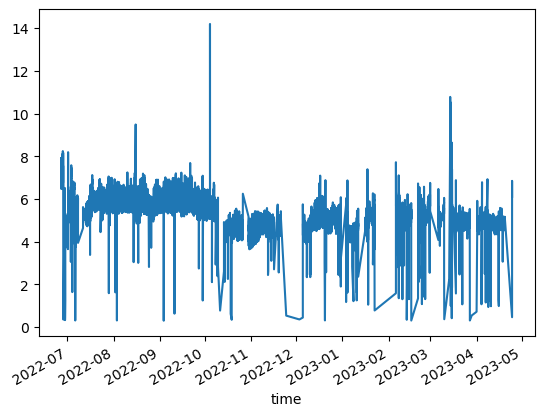

In [136]:
new_x.plot()

In [74]:
len(new_x)

57475

In [178]:
new_x.reset_index

<bound method Series.reset_index of time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
                        ...   
2023-04-24 15:55:00    6.06086
2023-04-24 16:00:00    5.80246
2023-04-24 16:05:00    5.80947
2023-04-24 16:10:00    5.73999
2023-04-24 16:15:00    6.10215
Name: xVRMS, Length: 57475, dtype: float64>

<Axes: xlabel='time'>

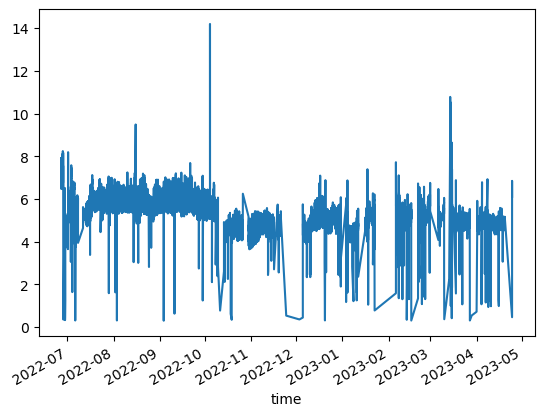

In [179]:
new_x.reset_index()
new_x.plot()

In [180]:
new_x=clean_limit(new_x,up_limit=up_limit,low_limit=low_limit)

<Axes: xlabel='time'>

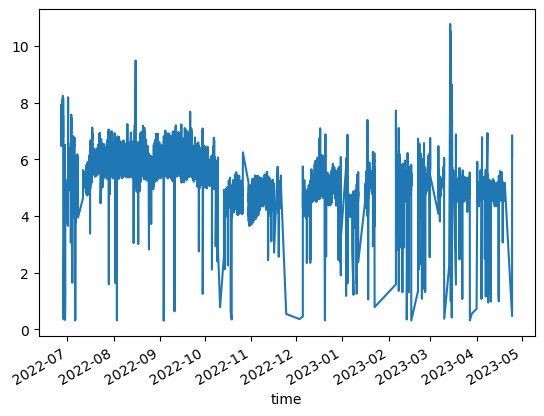

In [181]:
new_x.plot()

In [141]:
from statsmodels.tsa.stattools import adfuller
pl=adfuller(new_x)[0]
if pl<0.5:
  print(True)
else:
  print(False)

True


In [182]:
new_x.isnull().sum()

0

In [142]:
new_x.head()

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [143]:
new_x.index = pd.to_datetime(new_x.index)
new_x.head()


time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [89]:
new_x = new_x.asfreq('H')
new_x.head()

time
2022-06-26 21:35:00    7.53931
2022-06-26 22:35:00    7.21619
2022-06-26 23:35:00    7.15734
2022-06-27 00:35:00    6.98967
2022-06-27 01:35:00    6.97217
Freq: H, Name: xVRMS, dtype: float64

In [144]:
new_x.isnull().sum()

0

In [145]:
new_x.reset_index()

,time,xVRMS
0,2022-06-26 21:35:00,7.53931
1,2022-06-26 21:40:00,7.36773
2,2022-06-26 21:45:00,7.18102
3,2022-06-26 21:50:00,7.28957
4,2022-06-26 21:55:00,7.10303
...,...,...
57469,2023-04-24 15:55:00,6.06086
57470,2023-04-24 16:00:00,5.80246
57471,2023-04-24 16:05:00,5.80947
57472,2023-04-24 16:10:00,5.73999


<Axes: xlabel='time'>

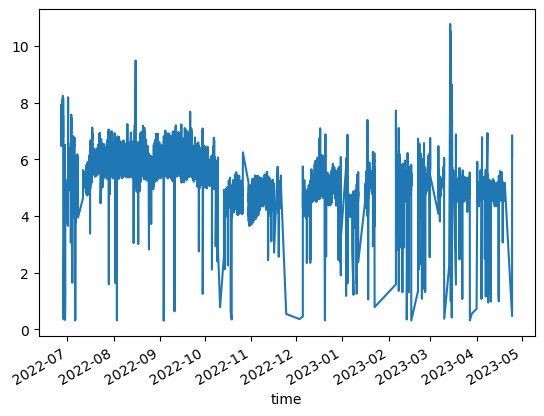

In [146]:
new_x.plot()

In [183]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()


In [184]:
imputed_data= pd.DataFrame(imputer.fit_transform(new_x.values.reshape(-1, 1)), columns=[new_x.name])


In [185]:
imputed_data.head()

,xVRMS
0,7.53931
1,7.36773
2,7.18102
3,7.28957
4,7.10303


In [151]:
len(imputed_data)

57474

<Axes: >

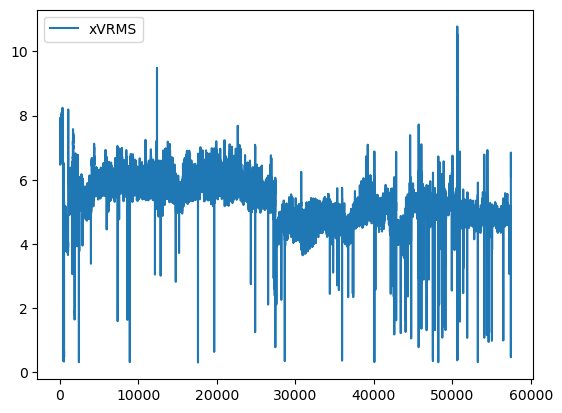

In [150]:
imputed_data.plot()

In [188]:
len(imputed_data)

57474

In [189]:
len(new_x)

57474

In [190]:
imputed_data.index = pd.to_datetime(new_x.index)

In [193]:
imputed_data.head()

,xVRMS
time,
2022-06-26 21:35:00,7.53931
2022-06-26 21:40:00,7.36773
2022-06-26 21:45:00,7.18102
2022-06-26 21:50:00,7.28957
2022-06-26 21:55:00,7.10303


<Axes: xlabel='time'>

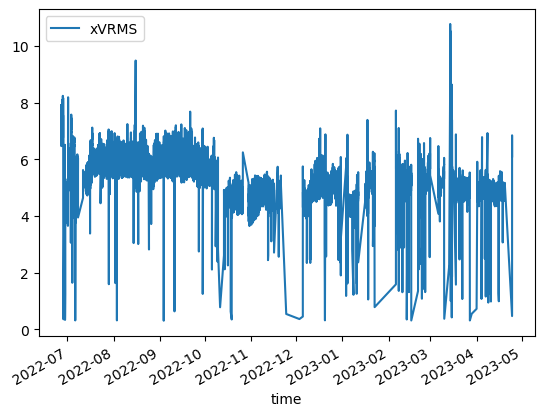

In [191]:
imputed_data.plot()

In [167]:
new_x2=new_x.copy()

In [168]:
for i in range(len(new_x)):
    new_x2[i]=imputed_data.iloc(0)[i]
new_x2.head()

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [170]:
new_x2.isnull().sum()

0

In [171]:
new_x.isnull().sum()

0

<Axes: xlabel='time'>

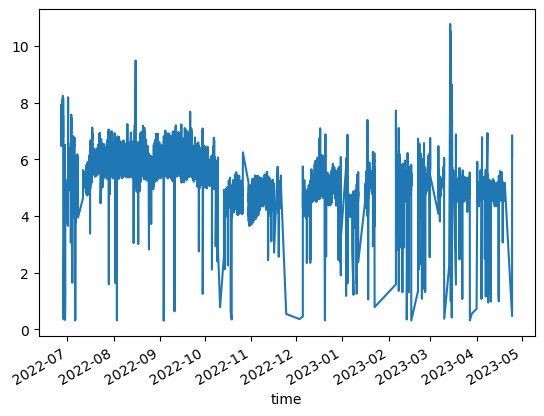

In [169]:
new_x2.plot()

In [194]:
imputed_data.index = pd.to_datetime(imputed_data.index)



In [196]:
type(imputed_data)

pandas.core.frame.DataFrame

In [ ]:
#https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

NameError: name 'plot' is not defined

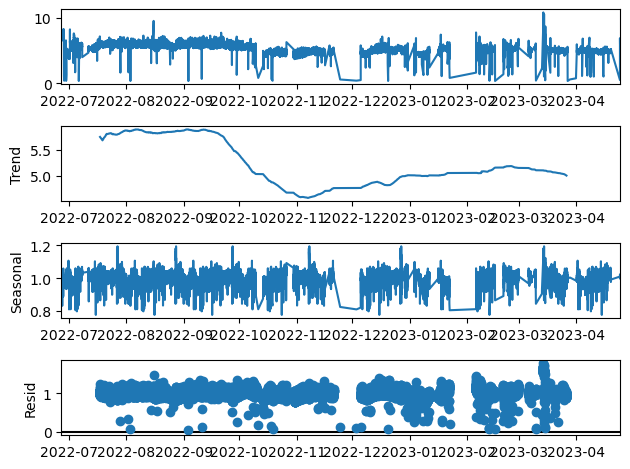

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(imputed_data, model='multiplicative',period=8760)
result.plot()
plot.show()

In [211]:
corr_matrix= imputed_data.corr()
corr_matrix

,xVRMS
xVRMS,1.0


In [31]:
def df_to_X_y(df,window_size=5):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label=df_as_np[i+window_size]
    y.append(label)
  return np.array(X),np.array(y)

In [33]:
WINDOW_SIZE=5
X,y =df_to_X_y(longest_dataframe,WINDOW_SIZE)
X.shape,y.shape


((2954, 5, 1), (2954,))

In [34]:
X_train, y_train=X[:1750],y[:1750]
X_val, y_val=X[1750:2200],y[1750:2200]
X_test, y_test=X[2200:],y[2200:]
X_train.shape, y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((1750, 5, 1), (1750,), (450, 5, 1), (450,), (754, 5, 1), (754,))

In [216]:
!pip install tensorflow

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [234]:
from keras.engine.input_layer import InputLayer
model1=Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [236]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [237]:
cp= ModelCheckpoint("model1/",save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [238]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10, callbacks=[cp])

Epoch 1/10
1223/1250 [============================>.] - ETA: 0s - loss: 2.8372 - root_mean_squared_error: 1.6844

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 5s 3ms/step - loss: 2.7790 - root_mean_squared_error: 1.6670 - val_loss: 0.1554 - val_root_mean_squared_error: 0.3942
Epoch 2/10
1220/1250 [============================>.] - ETA: 0s - loss: 0.0721 - root_mean_squared_error: 0.2685

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0721 - root_mean_squared_error: 0.2686 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3288
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 0.0479 - root_mean_squared_error: 0.2188

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0479 - root_mean_squared_error: 0.2188 - val_loss: 0.1073 - val_root_mean_squared_error: 0.3276
Epoch 4/10
1240/1250 [============================>.] - ETA: 0s - loss: 0.0461 - root_mean_squared_error: 0.2148

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0465 - root_mean_squared_error: 0.2157 - val_loss: 0.1057 - val_root_mean_squared_error: 0.3251
Epoch 5/10
1242/1250 [============================>.] - ETA: 0s - loss: 0.0458 - root_mean_squared_error: 0.2140

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0456 - root_mean_squared_error: 0.2137 - val_loss: 0.1023 - val_root_mean_squared_error: 0.3198
Epoch 6/10
1223/1250 [============================>.] - ETA: 0s - loss: 0.0449 - root_mean_squared_error: 0.2118

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0451 - root_mean_squared_error: 0.2123 - val_loss: 0.1000 - val_root_mean_squared_error: 0.3162
Epoch 7/10
1247/1250 [============================>.] - ETA: 0s - loss: 0.0448 - root_mean_squared_error: 0.2116

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0447 - root_mean_squared_error: 0.2115 - val_loss: 0.0998 - val_root_mean_squared_error: 0.3159
Epoch 8/10
1225/1250 [============================>.] - ETA: 0s - loss: 0.0434 - root_mean_squared_error: 0.2083

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 5s 4ms/step - loss: 0.0441 - root_mean_squared_error: 0.2100 - val_loss: 0.0973 - val_root_mean_squared_error: 0.3120
Epoch 9/10
1244/1250 [============================>.] - ETA: 0s - loss: 0.0438 - root_mean_squared_error: 0.2094

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0438 - root_mean_squared_error: 0.2093 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3082
Epoch 10/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 0.0969 - val_root_mean_squared_error: 0.3112


In [239]:
from tensorflow.keras.models import load_model
model1 =load_model("model1/")

In [240]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results


1250/1250 [==============================] - 1s 906us/step


,Train Predictions,Actuals
0,7.150827,6.97452
1,7.052352,7.32027
2,7.108765,7.00123
3,7.045632,7.60896
4,7.210718,7.22664
...,...,...
39995,5.075764,5.06930
39996,5.062670,4.96240
39997,5.014192,4.93230
39998,4.982642,4.91900


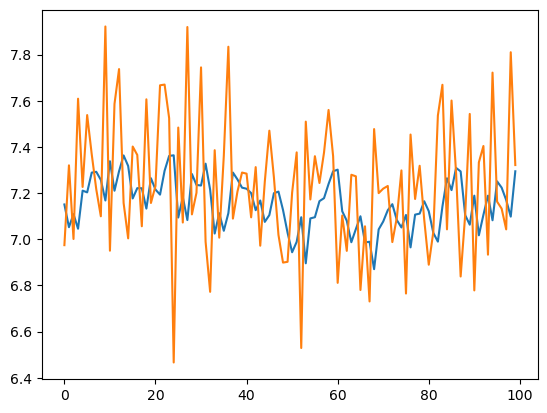

In [241]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [242]:
val_predictions=model1.predict(X_val).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

250/250 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,4.997811,5.09775
1,5.033718,4.99840
2,5.028112,4.85065
3,4.968559,5.09155
4,5.010457,5.24150
...,...,...
7995,4.858238,4.84294
7996,4.842139,5.02171
7997,4.900855,5.05276
7998,4.963544,4.89027


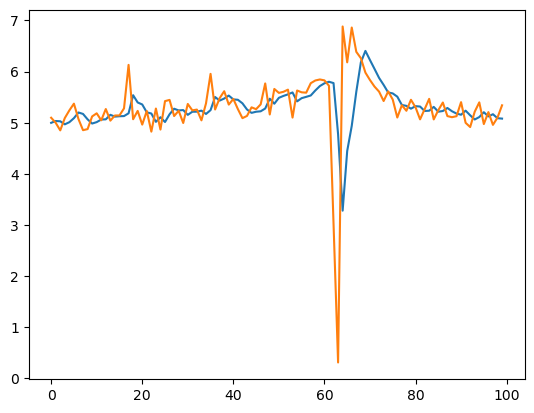

In [243]:
plt.plot(val_results["Train Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [244]:
X_test

array([[[[4.84294]],

        [[5.02171]],

        [[5.05276]],

        [[4.89027]],

        [[4.99602]]],


       [[[5.02171]],

        [[5.05276]],

        [[4.89027]],

        [[4.99602]],

        [[4.92699]]],


       [[[5.05276]],

        [[4.89027]],

        [[4.99602]],

        [[4.92699]],

        [[5.28242]]],


       ...,


       [[[6.84768]],

        [[6.47478]],

        [[6.06407]],

        [[6.06086]],

        [[5.80246]]],


       [[[6.47478]],

        [[6.06407]],

        [[6.06086]],

        [[5.80246]],

        [[5.80947]]],


       [[[6.06407]],

        [[6.06086]],

        [[5.80246]],

        [[5.80947]],

        [[5.73999]]]])

In [245]:
test_predictions=model1.predict(X_test).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

296/296 [==============================] - 0s 947us/step


,Train Predictions,Actuals
0,4.974933,4.92699
1,4.957831,5.28242
2,5.074688,5.01042
3,5.056880,5.19657
4,5.119744,5.21792
...,...,...
9464,5.643883,6.06086
9465,5.951633,5.80246
9466,6.032914,5.80947
9467,5.902314,5.73999


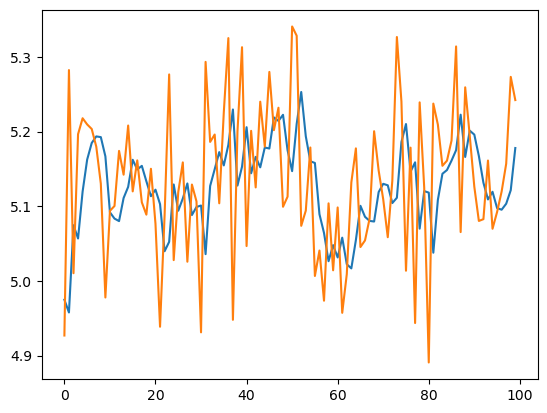

In [246]:
plt.plot(test_results["Train Predictions"][:100])
plt.plot(test_results["Actuals"][:100])

In [248]:
# Modelin doğruluğunu hesaplama
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.207, Test Accuracy: 0.360


# Model2 

In [257]:
df_x_vrms=imputed_data



In [258]:
Q1 = df_x_vrms.quantile(0.25)# değişken short landığında %25 inci değer
Q3 = df_x_vrms.quantile(0.75)
IQR = Q3-Q1

In [259]:
Q1 , Q3 , IQR

(xVRMS    4.8368
 Name: 0.25, dtype: float64,
 xVRMS    5.735518
 Name: 0.75, dtype: float64,
 xVRMS    0.898718
 dtype: float64)

In [260]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [261]:
alt_sinir,ust_sinir

(xVRMS    3.488724
 dtype: float64,
 xVRMS    7.083594
 dtype: float64)

In [262]:
aykiri_df=(df_x_vrms < alt_sinir) | (df_x_vrms > ust_sinir)

In [263]:
len(aykiri_df)

57474

In [264]:
df_x_vrms[aykiri_df]

,xVRMS
time,
2022-06-26 21:35:00,7.53931
2022-06-26 21:40:00,7.36773
2022-06-26 21:45:00,7.18102
2022-06-26 21:50:00,7.28957
2022-06-26 21:55:00,7.10303
...,...
2023-04-24 15:55:00,NaN
2023-04-24 16:00:00,NaN
2023-04-24 16:05:00,NaN


In [265]:
df_x_vrms[aykiri_df].drop

<bound method DataFrame.drop of                        xVRMS
time                        
2022-06-26 21:35:00  7.53931
2022-06-26 21:40:00  7.36773
2022-06-26 21:45:00  7.18102
2022-06-26 21:50:00  7.28957
2022-06-26 21:55:00  7.10303
...                      ...
2023-04-24 15:55:00      NaN
2023-04-24 16:00:00      NaN
2023-04-24 16:05:00      NaN
2023-04-24 16:10:00      NaN
2023-04-24 16:15:00      NaN

[57474 rows x 1 columns]>

In [270]:
len(df_x_vrms[aykiri_df])

57474

In [266]:
len(df_x_vrms)

57474

In [267]:
df_x_vrms.isnull().sum()

xVRMS    0
dtype: int64

In [268]:
df_x_vrms.tail()

,xVRMS
time,
2023-04-24 15:55:00,6.06086
2023-04-24 16:00:00,5.80246
2023-04-24 16:05:00,5.80947
2023-04-24 16:10:00,5.73999
2023-04-24 16:15:00,6.10215


In [269]:
df_x_vrms.isna()

,xVRMS
time,
2022-06-26 21:35:00,False
2022-06-26 21:40:00,False
2022-06-26 21:45:00,False
2022-06-26 21:50:00,False
2022-06-26 21:55:00,False
...,...
2023-04-24 15:55:00,False
2023-04-24 16:00:00,False
2023-04-24 16:05:00,False


In [271]:
from keras.engine.input_layer import InputLayer
from keras.layers import Dense, LSTM

model2 = Sequential()
model2.add(InputLayer((WINDOW_SIZE, 1)))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(32))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(optimizer='adam', loss='mse')

history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),callbacks=[cp])


Epoch 1/100
1250/1250 [==============================] - 5s 3ms/step - loss: 0.7272 - val_loss: 0.1060
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0493 - val_loss: 0.1003
Epoch 3/100
1248/1250 [============================>.] - ETA: 0s - loss: 0.0463

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 7s 5ms/step - loss: 0.0463 - val_loss: 0.0920
Epoch 4/100
1230/1250 [============================>.] - ETA: 0s - loss: 0.0466

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 7s 6ms/step - loss: 0.0462 - val_loss: 0.0889
Epoch 5/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0452 - val_loss: 0.0889
Epoch 6/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0450 - val_loss: 0.0895
Epoch 7/100
1242/1250 [============================>.] - ETA: 0s - loss: 0.0443

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 7s 5ms/step - loss: 0.0443 - val_loss: 0.0866
Epoch 8/100
1232/1250 [============================>.] - ETA: 0s - loss: 0.0446

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 6s 5ms/step - loss: 0.0446 - val_loss: 0.0866
Epoch 9/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0436 - val_loss: 0.0873
Epoch 10/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0439 - val_loss: 0.0881
Epoch 11/100
1235/1250 [============================>.] - ETA: 0s - loss: 0.0437

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 7s 5ms/step - loss: 0.0434 - val_loss: 0.0861
Epoch 12/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0432 - val_loss: 0.0865
Epoch 13/100
1230/1250 [============================>.] - ETA: 0s - loss: 0.0434

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 7s 5ms/step - loss: 0.0433 - val_loss: 0.0854
Epoch 14/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0433 - val_loss: 0.0878
Epoch 15/100
1238/1250 [============================>.] - ETA: 0s - loss: 0.0429

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 7s 6ms/step - loss: 0.0431 - val_loss: 0.0847
Epoch 16/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0425 - val_loss: 0.0859
Epoch 17/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0431 - val_loss: 0.0857
Epoch 18/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0422 - val_loss: 0.0930
Epoch 19/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0425 - val_loss: 0.0858
Epoch 20/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0419 - val_loss: 0.0866
Epoch 21/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0420 - val_loss: 0.0879
Epoch 22/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0423 - val_loss: 0.0853
Epoch 23/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0417 - val_loss: 0.0849
Epoch 24/100
1250/1250 [==============================] - 4s 3ms/step - loss:

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1250/1250 [==============================] - 7s 6ms/step - loss: 0.0417 - val_loss: 0.0847
Epoch 27/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0412 - val_loss: 0.0869
Epoch 28/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0411 - val_loss: 0.0872
Epoch 29/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0413 - val_loss: 0.0866
Epoch 30/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0410 - val_loss: 0.0862
Epoch 31/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0409 - val_loss: 0.0870
Epoch 32/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0410 - val_loss: 0.0859
Epoch 33/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0409 - val_loss: 0.0868
Epoch 34/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0408 - val_loss: 0.0863
Epoch 35/100
1250/1250 [==============================] - 3s 3ms/step - loss:

In [273]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 64)             16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 29,985
Trainable params: 29,985
Non-trainable params: 0
_________________________________________________________________


In [276]:
cp= ModelCheckpoint("model2/",save_best_only=True)

In [278]:
from tensorflow.keras.models import load_model
model2 =load_model("model2/")

OSError: No file or directory found at model2/

In [279]:
train_predictions=model2.predict(X_train).flatten()
train_results=pd.DataFrame(data={"Train Predictions": train_predictions,"Actuals":y_train.flatten()})
train_results

1250/1250 [==============================] - 2s 1ms/step


,Train Predictions,Actuals
0,7.219671,6.97452
1,7.119796,7.32027
2,7.153518,7.00123
3,7.081712,7.60896
4,7.189896,7.22664
...,...,...
39995,5.082091,5.06930
39996,5.054455,4.96240
39997,4.962845,4.93230
39998,4.950058,4.91900


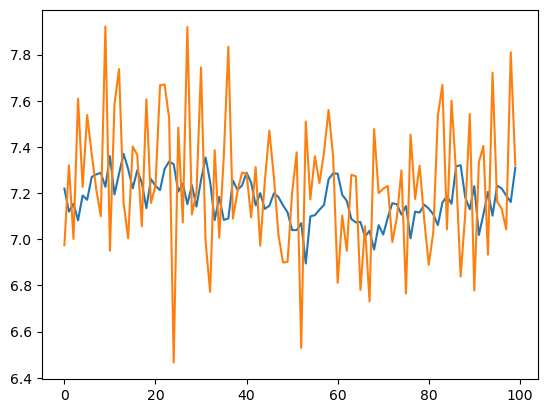

In [280]:
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])

In [281]:
test_predictions=model2.predict(X_test).flatten()
test_results=pd.DataFrame(data={"Train Predictions": test_predictions,"Actuals":y_test.flatten()})
test_results

296/296 [==============================] - 1s 1ms/step


,Train Predictions,Actuals
0,4.912267,4.92699
1,4.923813,5.28242
2,4.973276,5.01042
3,4.953935,5.19657
4,5.015630,5.21792
...,...,...
9464,6.097237,6.06086
9465,5.885928,5.80246
9466,6.076898,5.80947
9467,5.931884,5.73999


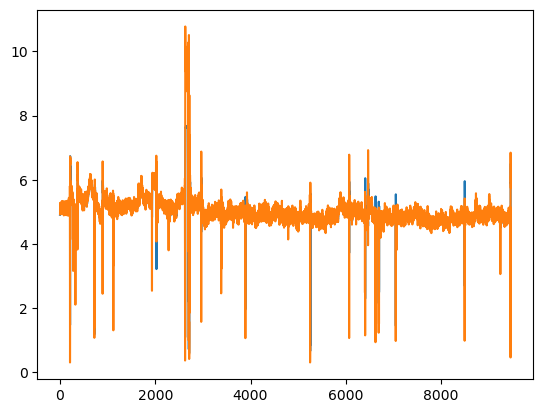

In [282]:
plt.plot(test_results["Train Predictions"])
plt.plot(test_results["Actuals"])

In [284]:
# Modelin doğruluğunu hesaplama
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

TypeError: cannot unpack non-iterable float object

# Model 3


In [1]:
df = pd.read_csv(r"C:\Users\denem\Downloads\EsnDegrmn1mtronrlmn.csv")
df.head()

NameError: name 'pd' is not defined

In [173]:
def df_to_X_y(df,window_size=5):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label=df_as_np[i+window_size]
    y.append(label)
  return np.array(X),np.array(y)

In [4]:
WINDOW_SIZE=5
X,y =df_to_X_y(longest_dataframe,WINDOW_SIZE)
X.shape,y.shape

NameError: name 'longest_dataframe' is not defined

In [176]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((24020, 5, 1, 1),
 (24020, 1),
 (3002, 5, 1, 1),
 (3002, 1),
 (3003, 5, 1, 1),
 (3003, 1))

In [20]:
df['xVRMS'][1]

7.36773

In [21]:
off_limit=0.3
list_x=[]
for i in range(len(df["xVRMS"])):
    new_x=[]
    if df["xVRMS"][i]>off_limit:
        new_x.add(df['xVRMS'][i])
    else:
        list_x.add(new_x)
        new_x.clear()

len(list_x)
        

AttributeError: 'list' object has no attribute 'add'

In [26]:
def list_test(df):
    result = []
    temp_list = []

    # DataFrame'de dolaşarak istenen işlemi gerçekleştirin
    for index, row in df.iterrows():
        if row['xVRMS'] <= 0.3:
            temp_list.append(row['xVRMS'])
        else:
            if temp_list:
                result.append(temp_list)
                temp_list = []

    # Son değeri kontrol edin ve gerekiyorsa ekleyin
    if temp_list:
        result.append(temp_list)
    return result

In [27]:
list_x=list_test(df)
type(list_x)

list

In [28]:
len(list_x)

144

In [29]:
list_x[0].head()

AttributeError: 'list' object has no attribute 'head'

In [16]:
filtered_indices = df[df['xVRMS'] < 0.3].index
len(filtered_indices)

22357

In [17]:
type(filtered_indices)

pandas.core.indexes.datetimes.DatetimeIndex

In [18]:
filtered_indices[186]

Timestamp('2022-06-29 11:05:00')

In [20]:
filtered_indices.sort_values()
filtered_indices[186]

Timestamp('2022-06-29 11:05:00')

In [21]:
df["xVRMS"].head()

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [23]:
list_x=[]
for i in range(len(filtered_indices)-1):
    space_x= df["xVRMS"][filtered_indices[i]:filtered_indices[i+1]]
    list_x.append(space_x)
    del space_x

In [24]:
len(list_x)

22356

In [26]:
dataframe_list=list_x
max_length = 0
longest_dataframe = None

for df in dataframe_list:
    if len(df) > max_length:
        max_length = len(df)
        longest_dataframe = df

print("En uzun DataFrame:")
print(longest_dataframe)


En uzun DataFrame:
time
2022-09-15 08:15:00    0.0949
2022-09-15 09:15:00    5.8464
2022-09-15 09:20:00    5.7288
2022-09-15 09:25:00    5.6272
2022-09-15 09:30:00    5.6363
                        ...  
2022-09-25 15:25:00    6.3470
2022-09-25 15:30:00    6.2806
2022-09-25 15:35:00    6.3627
2022-09-25 15:40:00    6.2545
2022-09-25 15:45:00    0.1563
Name: xVRMS, Length: 2959, dtype: float64


In [28]:
len(longest_dataframe)

2959

In [29]:
type(longest_dataframe)

pandas.core.series.Series

In [38]:
from keras.engine.input_layer import InputLayer
model3 = Sequential()
model3.add(InputLayer((WINDOW_SIZE, 1)))
model3.add(LSTM(64, return_sequences=True))
model3.add(LSTM(32))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='linear'))

In [39]:
cp= ModelCheckpoint("model3/",save_best_only=True)
model3.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [41]:
model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, callbacks=[cp])

Epoch 1/100
46/55 [========================>.....] - ETA: 0s - loss: 34.2241 - root_mean_squared_error: 5.8501

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 10s 124ms/step - loss: 34.0344 - root_mean_squared_error: 5.8339 - val_loss: 32.3407 - val_root_mean_squared_error: 5.6869
Epoch 2/100
42/55 [=====================>........] - ETA: 0s - loss: 32.0247 - root_mean_squared_error: 5.6590

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 116ms/step - loss: 31.7137 - root_mean_squared_error: 5.6315 - val_loss: 29.8358 - val_root_mean_squared_error: 5.4622
Epoch 3/100
54/55 [============================>.] - ETA: 0s - loss: 27.9569 - root_mean_squared_error: 5.2874

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 112ms/step - loss: 27.9097 - root_mean_squared_error: 5.2830 - val_loss: 24.3737 - val_root_mean_squared_error: 4.9370
Epoch 4/100
52/55 [===========================>..] - ETA: 0s - loss: 21.2107 - root_mean_squared_error: 4.6055

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 118ms/step - loss: 21.0282 - root_mean_squared_error: 4.5857 - val_loss: 16.9109 - val_root_mean_squared_error: 4.1123
Epoch 5/100
52/55 [===========================>..] - ETA: 0s - loss: 14.1828 - root_mean_squared_error: 3.7660

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 106ms/step - loss: 14.0165 - root_mean_squared_error: 3.7439 - val_loss: 10.5099 - val_root_mean_squared_error: 3.2419
Epoch 6/100
55/55 [==============================] - ETA: 0s - loss: 8.4448 - root_mean_squared_error: 2.9060

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 118ms/step - loss: 8.4448 - root_mean_squared_error: 2.9060 - val_loss: 6.1017 - val_root_mean_squared_error: 2.4702
Epoch 7/100
44/55 [=======================>......] - ETA: 0s - loss: 5.1114 - root_mean_squared_error: 2.2608

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 106ms/step - loss: 4.8322 - root_mean_squared_error: 2.1982 - val_loss: 3.2800 - val_root_mean_squared_error: 1.8111
Epoch 8/100
52/55 [===========================>..] - ETA: 0s - loss: 2.5775 - root_mean_squared_error: 1.6055

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 107ms/step - loss: 2.5386 - root_mean_squared_error: 1.5933 - val_loss: 1.5949 - val_root_mean_squared_error: 1.2629
Epoch 9/100
50/55 [==========================>...] - ETA: 0s - loss: 1.2900 - root_mean_squared_error: 1.1358

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 7s 121ms/step - loss: 1.2607 - root_mean_squared_error: 1.1228 - val_loss: 0.7211 - val_root_mean_squared_error: 0.8491
Epoch 10/100
48/55 [=========================>....] - ETA: 0s - loss: 0.6252 - root_mean_squared_error: 0.7907

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 106ms/step - loss: 0.5976 - root_mean_squared_error: 0.7731 - val_loss: 0.2909 - val_root_mean_squared_error: 0.5394
Epoch 11/100
55/55 [==============================] - ETA: 0s - loss: 0.2881 - root_mean_squared_error: 0.5368

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 116ms/step - loss: 0.2881 - root_mean_squared_error: 0.5368 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3420
Epoch 12/100
49/55 [=========================>....] - ETA: 0s - loss: 0.1676 - root_mean_squared_error: 0.4094

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 111ms/step - loss: 0.1666 - root_mean_squared_error: 0.4082 - val_loss: 0.0582 - val_root_mean_squared_error: 0.2412
Epoch 13/100
54/55 [============================>.] - ETA: 0s - loss: 0.1261 - root_mean_squared_error: 0.3552

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 116ms/step - loss: 0.1258 - root_mean_squared_error: 0.3546 - val_loss: 0.0422 - val_root_mean_squared_error: 0.2055
Epoch 14/100
51/55 [==========================>...] - ETA: 0s - loss: 0.1147 - root_mean_squared_error: 0.3386

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 6s 106ms/step - loss: 0.1135 - root_mean_squared_error: 0.3369 - val_loss: 0.0395 - val_root_mean_squared_error: 0.1987
Epoch 15/100
55/55 [==============================] - 0s 7ms/step - loss: 0.1103 - root_mean_squared_error: 0.3320 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1989
Epoch 16/100
55/55 [==============================] - 0s 8ms/step - loss: 0.1095 - root_mean_squared_error: 0.3309 - val_loss: 0.0400 - val_root_mean_squared_error: 0.1999
Epoch 17/100
55/55 [==============================] - 0s 8ms/step - loss: 0.1093 - root_mean_squared_error: 0.3306 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2006
Epoch 18/100
55/55 [==============================] - 0s 7ms/step - loss: 0.1092 - root_mean_squared_error: 0.3305 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2007
Epoch 19/100
55/55 [==============================] - 0s 8ms/step - loss: 0.1092 - root_mean_squared_error: 0.3305 - val_loss: 0.0406 - val_root_mean_s

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 67ms/step - loss: 0.1054 - root_mean_squared_error: 0.3246 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1977
Epoch 60/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1052 - root_mean_squared_error: 0.3243 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1977
Epoch 61/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1049 - root_mean_squared_error: 0.3240 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 62/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1043 - root_mean_squared_error: 0.3230 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 63/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1037 - root_mean_squared_error: 0.3220 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 64/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1033 - root_mean_squared_error: 0.3214 - val_loss: 0.0396 - val_root_mean_sq

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 3s 62ms/step - loss: 0.1022 - root_mean_squared_error: 0.3196 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1976
Epoch 67/100
43/55 [======================>.......] - ETA: 0s - loss: 0.1027 - root_mean_squared_error: 0.3204

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 76ms/step - loss: 0.1015 - root_mean_squared_error: 0.3186 - val_loss: 0.0388 - val_root_mean_squared_error: 0.1971
Epoch 68/100
53/55 [===========================>..] - ETA: 0s - loss: 0.1007 - root_mean_squared_error: 0.3174

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 3s 62ms/step - loss: 0.1010 - root_mean_squared_error: 0.3179 - val_loss: 0.0388 - val_root_mean_squared_error: 0.1969
Epoch 69/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1001 - root_mean_squared_error: 0.3163 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2011
Epoch 70/100
54/55 [============================>.] - ETA: 0s - loss: 0.0990 - root_mean_squared_error: 0.3146

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 71ms/step - loss: 0.0991 - root_mean_squared_error: 0.3148 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1962
Epoch 71/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0979 - root_mean_squared_error: 0.3128 - val_loss: 0.0395 - val_root_mean_squared_error: 0.1987
Epoch 72/100
48/55 [=========================>....] - ETA: 0s - loss: 0.0973 - root_mean_squared_error: 0.3119

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 3s 63ms/step - loss: 0.0965 - root_mean_squared_error: 0.3106 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1961
Epoch 73/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0951 - root_mean_squared_error: 0.3085 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1990
Epoch 74/100
48/55 [=========================>....] - ETA: 0s - loss: 0.0933 - root_mean_squared_error: 0.3055

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 73ms/step - loss: 0.0931 - root_mean_squared_error: 0.3051 - val_loss: 0.0379 - val_root_mean_squared_error: 0.1946
Epoch 75/100
55/55 [==============================] - ETA: 0s - loss: 0.0908 - root_mean_squared_error: 0.3013

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 65ms/step - loss: 0.0908 - root_mean_squared_error: 0.3013 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936
Epoch 76/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0886 - root_mean_squared_error: 0.2977 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1951
Epoch 77/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0852 - root_mean_squared_error: 0.2918 - val_loss: 0.0377 - val_root_mean_squared_error: 0.1942
Epoch 78/100
55/55 [==============================] - ETA: 0s - loss: 0.0817 - root_mean_squared_error: 0.2858

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 65ms/step - loss: 0.0817 - root_mean_squared_error: 0.2858 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1914
Epoch 79/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0781 - root_mean_squared_error: 0.2794 - val_loss: 0.0368 - val_root_mean_squared_error: 0.1919
Epoch 80/100
53/55 [===========================>..] - ETA: 0s - loss: 0.0728 - root_mean_squared_error: 0.2699

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 71ms/step - loss: 0.0734 - root_mean_squared_error: 0.2709 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1900
Epoch 81/100
55/55 [==============================] - 0s 3ms/step - loss: 0.0696 - root_mean_squared_error: 0.2638 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1916
Epoch 82/100
44/55 [=======================>......] - ETA: 0s - loss: 0.0641 - root_mean_squared_error: 0.2531

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 3s 64ms/step - loss: 0.0628 - root_mean_squared_error: 0.2506 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1896
Epoch 83/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - root_mean_squared_error: 0.2381 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2037
Epoch 84/100
55/55 [==============================] - ETA: 0s - loss: 0.0520 - root_mean_squared_error: 0.2280

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


55/55 [==============================] - 4s 70ms/step - loss: 0.0520 - root_mean_squared_error: 0.2280 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1888
Epoch 85/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0459 - root_mean_squared_error: 0.2142 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1917
Epoch 86/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0419 - root_mean_squared_error: 0.2046 - val_loss: 0.0373 - val_root_mean_squared_error: 0.1932
Epoch 87/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0398 - root_mean_squared_error: 0.1995 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1920
Epoch 88/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0377 - root_mean_squared_error: 0.1940 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1993
Epoch 89/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0356 - root_mean_squared_error: 0.1888 - val_loss: 0.0407 - val_root_mean_sq

In [42]:
from tensorflow.keras.models import load_model
model3 =load_model("model3/")

In [44]:
train_predictions = model3.predict(X_train).flatten()
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train.flatten()})
train_results

55/55 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,5.007337,5.52920
1,5.760474,5.79260
2,5.736281,5.57690
3,5.725396,5.41020
4,5.713327,5.56940
...,...,...
1745,5.759335,5.73030
1746,5.746617,5.68000
1747,5.736870,5.84570
1748,5.773076,5.83180


In [46]:
val_predictions=model3.predict(X_val).flatten()
val_results=pd.DataFrame(data={"Train Predictions": val_predictions,"Actuals":y_val.flatten()})
val_results

15/15 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,5.808006,5.52380
1,5.803269,5.72330
2,5.799168,5.67440
3,5.772553,5.69810
4,5.752204,5.78555
...,...,...
445,5.931168,5.92435
446,5.914344,5.95290
447,5.917045,5.91610
448,5.917644,6.06960


In [48]:
# Modelin doğruluğunu hesaplama
_, train_acc = model3.evaluate(X_train, y_train, verbose=0)
_, test_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.217, Test Accuracy: 0.283


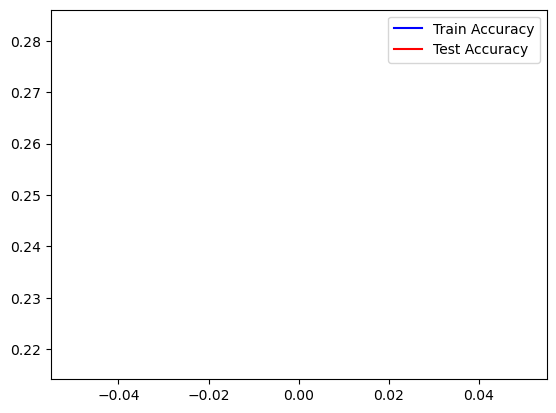

In [52]:
plt.plot( train_acc, 'b', label='Train Accuracy')
plt.plot(test_acc, 'r', label='Test Accuracy')

plt.legend()
plt.show()

# Trend Test

In [50]:
new_x=df["xVRMS"]

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputed_data= pd.DataFrame(imputer.fit_transform(new_x.values.reshape(-1, 1)), columns=[new_x.name])
imputed_data.head()


,xVRMS
0,7.53931
1,7.36773
2,7.18102
3,7.28957
4,7.10303


In [19]:
imputed_data.index = pd.to_datetime(new_x.index)
"""for i in range(len(new_x)):
    new_x2 = pd.DataFrame(imputed_data.iloc[i])
new_x2.head()
"""

'for i in range(len(new_x)):\n    new_x2 = pd.DataFrame(imputed_data.iloc[i])\nnew_x2.head()\n'

## Trend Additive 

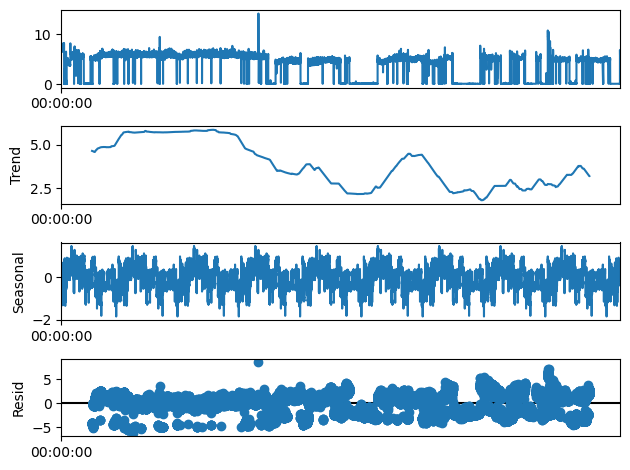

In [20]:
imputed_data.index = pd.to_datetime(imputed_data.index)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(imputed_data, model='additive',period=8760)
result.plot()
plt.show()

## Trend Multiplicative 

In [21]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        return filtered
    else:
        filtered = df_column[(df_column >= low_limit) & (df_column <= up_limit)]
        return filtered


In [26]:
aykiri_df=new_x[new_x<0.3]

In [27]:
len(aykiri_df)

22357

In [33]:
aykiri_df.head()

379    0.14005
380    0.05440
381    0.00000
382    0.06547
383    0.00000
Name: xVRMS, dtype: float64

In [30]:
len(new_x)

79832

In [29]:
if "aykiri_df" in new_x:
  new_x[aykiri_df].drop()
else:
  print("The key 'aykiri_df' does not exist in the dictionary.")

The key 'aykiri_df' does not exist in the dictionary.


In [52]:
new_x = new_x[new_x >= 0.3]

In [53]:
len(new_x)

57475

In [58]:
new_x.head()

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [48]:
df["time"]=pd.to_datetime(df["time"])

In [49]:
df=df.set_index(df["time"])

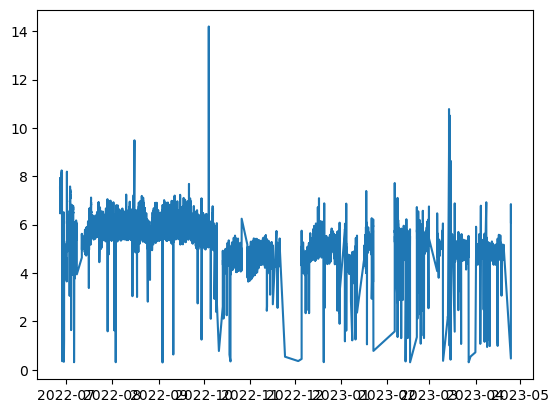

In [59]:
plt.plot(new_x.index,new_x.values)
plt.show()

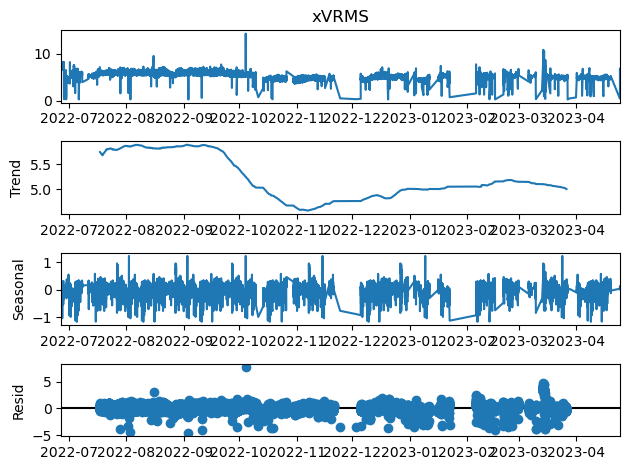

In [60]:
imputed_data.index = pd.to_datetime(imputed_data.index)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(new_x, model='additive',period=8760)
result.plot()
plt.show()

In [154]:
divice_x=new_x["2022-10-1 0:0:00":]

In [155]:
for i in range(len(divice_x)):
    if divice_x[i]< 1:
        short_value=divice_x[i]
        break
short_value

0.77475

In [156]:
len(divice_x)

32281

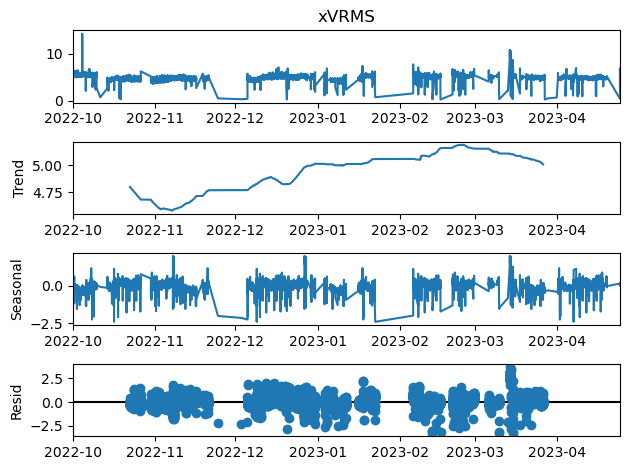

In [157]:
imputed_data.index = pd.to_datetime(imputed_data.index)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(divice_x, model='additive',period=8760)
result.plot()
plt.show()

In [158]:
type(divice_x)

pandas.core.series.Series

In [159]:
df_divice_x=pd.DataFrame(divice_x)
type(df_divice_x)

pandas.core.frame.DataFrame

In [162]:
df_divice_x.head()

,xVRMS
time,
2022-10-01 00:00:00,5.4021
2022-10-01 00:05:00,5.6543
2022-10-01 00:10:00,5.7750
2022-10-01 00:15:00,5.6432
2022-10-01 00:20:00,5.7559


In [164]:
len(df_divice_x)

32281

In [168]:
filtered_rows = df[df['xVRMS'] == short_value]

# Retrieve the index values of the filtered rows
indices = filtered_rows.index
indices

DatetimeIndex(['2022-10-11 05:35:00'], dtype='datetime64[ns]', name='time', freq=None)

In [171]:
new_divice_x=new_x["2022-10-11 05:35:00":]

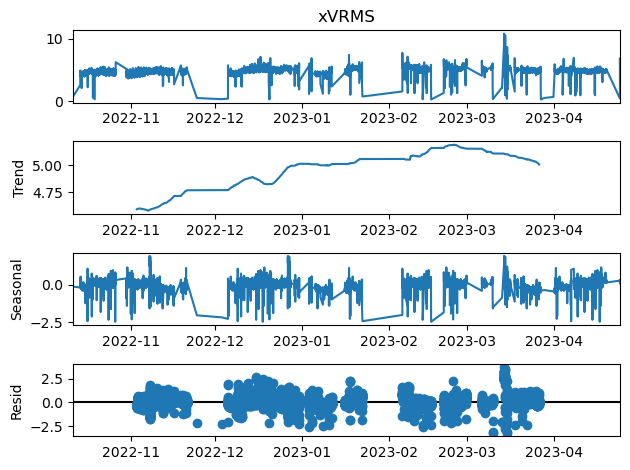

In [172]:
imputed_data.index = pd.to_datetime(imputed_data.index)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(new_divice_x, model='additive',period=8760)
result.plot()
plt.show()

# Model 4

In [174]:
new_divice_x=pd.DataFrame(new_divice_x)
type(new_divice_x)

pandas.core.frame.DataFrame

In [185]:
new_divice_x.head()

,xVRMS
time,
2022-10-11 05:35:00,0.77475
2022-10-13 19:50:00,2.60845
2022-10-13 19:55:00,2.76240
2022-10-13 20:05:00,2.81620
2022-10-13 20:10:00,4.92030


In [189]:
new_divice_x.index()

TypeError: 'DatetimeIndex' object is not callable

In [192]:
def clean_on_off(process_column, on_threshold, off_threshold):
    selected_data = process_column.loc[on_threshold:off_threshold]
    process_column = process_column.drop(selected_data.index)
    return process_column

In [191]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        return filtered
    else:
        filtered = df_column[(df_column >= low_limit) & (df_column <= up_limit)]
        return filtered

In [194]:
new_divice_x= clean_limit(new_divice_x["xVRMS"],low_limit=0.3)

In [197]:

process_clm = new_divice_x
#time_column = df["time"]
process_clm_mean = process_clm.mean()
process_clm_std = process_clm.std()

up_limit = process_clm_mean + 3 * process_clm_std
low_limit = process_clm_mean - 3 * process_clm_std

process_clm_mean,process_clm_std,up_limit,low_limit

(4.87038368065268, 0.48972128931764847, 6.339547548605626, 3.401219812699735)

In [198]:
WINDOW_SIZE=5
X,y =df_to_X_y(new_divice_x,WINDOW_SIZE)
X.shape,y.shape

((30025, 5, 1), (30025,))

In [199]:
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]  # %80
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]  # %10
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]  # %10

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((24020, 5, 1), (24020,), (3002, 5, 1), (3002,), (3003, 5, 1), (3003,))

In [200]:
from keras.engine.input_layer import InputLayer
model4 = Sequential()
model4.add(InputLayer((WINDOW_SIZE, 1)))
model4.add(LSTM(64, return_sequences=True))
model4.add(Dropout(0.2))
model4.add(LSTM(32))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='linear'))

In [201]:
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
cp= ModelCheckpoint("model4/",save_best_only=True)
model4.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [204]:
history=model4.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, callbacks=[cp])

Epoch 1/100
751/751 [==============================] - 5s 6ms/step - loss: 0.0695 - root_mean_squared_error: 0.2636 - val_loss: 0.0648 - val_root_mean_squared_error: 0.2545
Epoch 2/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0685 - root_mean_squared_error: 0.2618 - val_loss: 0.0633 - val_root_mean_squared_error: 0.2515
Epoch 3/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0698 - root_mean_squared_error: 0.2641 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2489
Epoch 4/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0699 - root_mean_squared_error: 0.2643 - val_loss: 0.0652 - val_root_mean_squared_error: 0.2554
Epoch 5/100
751/751 [==============================] - 5s 6ms/step - loss: 0.0698 - root_mean_squared_error: 0.2641 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2488
Epoch 6/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0694 - root_mean_squared_error: 0.2634 - val_loss: 0.0630 

751/751 [==============================] - 5s 7ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2551
Epoch 49/100
751/751 [==============================] - 5s 6ms/step - loss: 0.0670 - root_mean_squared_error: 0.2588 - val_loss: 0.0666 - val_root_mean_squared_error: 0.2581
Epoch 50/100
751/751 [==============================] - 6s 7ms/step - loss: 0.0678 - root_mean_squared_error: 0.2603 - val_loss: 0.0649 - val_root_mean_squared_error: 0.2547
Epoch 51/100
751/751 [==============================] - 6s 8ms/step - loss: 0.0678 - root_mean_squared_error: 0.2603 - val_loss: 0.0662 - val_root_mean_squared_error: 0.2572
Epoch 52/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0668 - root_mean_squared_error: 0.2585 - val_loss: 0.0655 - val_root_mean_squared_error: 0.2559
Epoch 53/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0666 - root_mean_squared_error: 0.2580 - val_loss: 0.0652 - val_r

751/751 [==============================] - 5s 7ms/step - loss: 0.0641 - root_mean_squared_error: 0.2532 - val_loss: 0.0648 - val_root_mean_squared_error: 0.2545
Epoch 96/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0623 - root_mean_squared_error: 0.2497 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2539
Epoch 97/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0638 - root_mean_squared_error: 0.2527 - val_loss: 0.0660 - val_root_mean_squared_error: 0.2570
Epoch 98/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0633 - root_mean_squared_error: 0.2516 - val_loss: 0.0662 - val_root_mean_squared_error: 0.2574
Epoch 99/100
751/751 [==============================] - 5s 6ms/step - loss: 0.0650 - root_mean_squared_error: 0.2549 - val_loss: 0.0637 - val_root_mean_squared_error: 0.2523
Epoch 100/100
751/751 [==============================] - 5s 7ms/step - loss: 0.0637 - root_mean_squared_error: 0.2524 - val_loss: 0.0646 - val_

In [205]:
# Modelin doğruluğunu hesaplama
_, train_acc = model4.evaluate(X_train, y_train, verbose=0)
_, test_acc = model4.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.259, Test Accuracy: 0.248


In [206]:
for epoch in range(len(history.history['loss'])):
    print('Epoch {}: loss = {:.4f}, accuracy = {:.4f}'.format(
        epoch + 1, history.history['loss'][epoch], history.history['accuracy'][epoch]))


KeyError: 'accuracy'

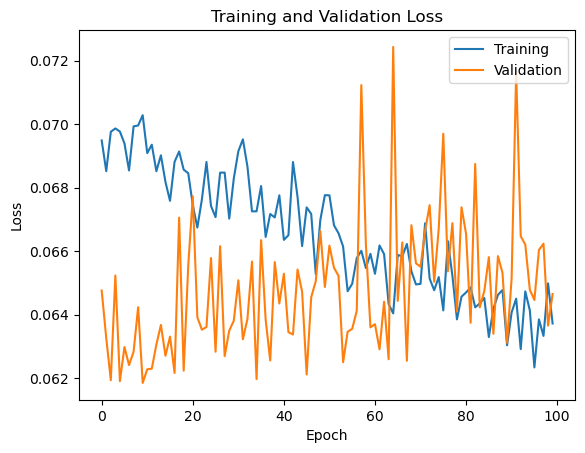

KeyError: 'accuracy'

In [207]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


## Keras Turner

In [216]:
!pip install keras
!pip install keras-tuner


In [244]:
# Örnek veri seti tanımı
train_data = (X_train, y_train)


In [ ]:
Hyperband()

In [218]:
import keras
from kerastuner import Hyperband
from kerastuner import HyperParameters

# Define the search space
hp = HyperParameters(
    objective='val_loss',
    max_trials=10,
    directory='/tmp/tuner',
    project_name='my_project',
    hyperparameters={
        'num_layers': hp.choice('num_layers', [1, 2, 3]),
        'num_neurons': hp.choice('num_neurons', [128, 256, 512]),
    }
)

NameError: name 'hp' is not defined

In [219]:
WINDOW_SIZE = 10


In [213]:

# Create the model
model = keras.Sequential([
    keras.layers.InputLayer((WINDOW_SIZE, 1)),
    keras.layers.LSTM(hp.Int('num_neurons'), return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(hp.Int('num_neurons')),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])


NameError: name 'hp' is not defined

In [ ]:
# Compile the model
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[keras.metrics.RootMeanSquaredError()])


In [229]:
def build_model(hp):
    model = keras.Sequential([
        keras.layers.InputLayer((WINDOW_SIZE, 1)),
        keras.layers.LSTM(hp.get('num_neurons'), return_sequences=True),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(hp.get('num_neurons')),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='linear'),
    ])
    model.compile(
        loss=keras.losses.MeanSquaredError(),
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        metrics=[keras.metrics.RootMeanSquaredError()]
    )
    return model

In [230]:
import keras
from kerastuner import Hyperband, HyperParameters

# Define the search space
hp = HyperParameters()
hp_space = hp.Int('num_layers', min_value=1, max_value=3)
hp_neurons = hp.Choice('num_neurons', [128, 256, 512])
build_model=build_model(hp)
# Create the tuner
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    directory='/tmp/tuner',
    project_name='my_project',
    hyperparameters=hp  # Use the HyperParameters object directly
)


TypeError: Inputs to a layer should be tensors. Got '<keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001B5CF5BAD40>' (of type <class 'keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters'>) as input for layer 'sequential_3'.

In [ ]:
    """ model.compile(
        loss=keras.losses.MeanSquaredError(),
        optimizer=keras.optimizers"""

In [ ]:

# Train the model
tuner.search(model, train_data, epochs=10)

In [237]:
import keras
from kerastuner import Hyperband

# Define the search space
hp1 = Hyperband(
    objective='val_loss',
    max_trials=10,
    directory='/tmp/tuner',
    project_name='my_project',
)
hp=Hyperband( hyperparameters={
        'num_layers': hp1.Int('num_layers', 1, 4),
        'num_neurons': hp1.Categorical('num_neurons', [128, 256, 512]),})

# Create the model
model = keras.Sequential([
    keras.layers.InputLayer((WINDOW_SIZE, 1)),
    keras.layers.LSTM(hp.Int('num_neurons'), return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(hp.Int('num_neurons')),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

# Compile the model
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[keras.metrics.RootMeanSquaredError()])

# Train the model
tuner.search(model, train_data, epochs=10)


ValueError: Unrecognized arguments ['max_trials'] for `BaseTuner.__init__()`.

In [249]:
import keras
from kerastuner import Hyperband

# Define the search space
hp = Hyperband(
    objective='val_loss',
    directory='/tmp/tuner',
    project_name='my_project',
)

# Create the model
model = keras.Sequential([
    keras.layers.InputLayer((WINDOW_SIZE, 1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(64, return_sequences=True),

    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

# Compile the model
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[keras.metrics.RootMeanSquaredError()])

# Train the model
hp.search(model, train_data, epochs=10,max_trials=10)
#best_models = hp.get_best_models()
#best_model = best_models[0]


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [7]:
df = pd.read_csv("C:/Users/denem/Downloads/EsnDegrmn1mtronrlmn.csv")


In [56]:
df["time"]=pd.to_datetime(df["time"])

In [57]:
df=df.set_index(df["time"])

In [58]:
df_x=df["xVRMS"]

In [ ]:
def set_index_time(df):
    df["time"]=pd.to_datetime(df["time"])
    df=df.set_index(df["time"])
    return df

In [59]:
df_x.head()

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
Name: xVRMS, dtype: float64

In [60]:
    def clean_limit(df, low_limit, up_limit=None):
        if up_limit is None:
            filtered = df[(df >= low_limit)]
            return filtered
        else:
            filtered = df[(df >= low_limit) & (df <= up_limit)]
            return filtered

In [61]:
df_x=clean_limit(df_x,low_limit=0.5)

In [62]:
df_x.isnull().sum()

0

In [63]:
df_x

time
2022-06-26 21:35:00    7.53931
2022-06-26 21:40:00    7.36773
2022-06-26 21:45:00    7.18102
2022-06-26 21:50:00    7.28957
2022-06-26 21:55:00    7.10303
                        ...   
2023-04-24 15:55:00    6.06086
2023-04-24 16:00:00    5.80246
2023-04-24 16:05:00    5.80947
2023-04-24 16:10:00    5.73999
2023-04-24 16:15:00    6.10215
Name: xVRMS, Length: 57455, dtype: float64

In [65]:
kpss_results = smt.kpss(df_x, regression='c')





C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [66]:
# Conduct the ADF test
adf_results = smt.adfuller(df_x)

In [67]:
adf_results_dict = dict(statistic=adf_results[0], pvalue=adf_results[1], critical_values=adf_results[2])
adf_results

(-10.796976367788462,
 2.0635997227817068e-19,
 36,
 57418,
 {'1%': -3.4304638944646526,
  '5%': -2.8615903391576176,
  '10%': -2.566796793843776},
 -4221.736947018027)

In [68]:
kpss_results[3]["5%"]

0.463

In [69]:
kpss_results

(17.194885245204024,
 0.01,
 140,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [34]:
kpss_results_dict = dict(statistic=kpss_results[0], pvalue=kpss_results[1], critical_values=kpss_results[2])

print(kpss_results_dict.keys())


dict_keys(['statistic', 'pvalue', 'critical_values'])


In [70]:
def test_stationarity(df):
    """
    Tests the stationarity of a time series using the KPSS and ADF tests.

    Args:
        df: A pandas DataFrame containing the time series data.

    Returns:
        A dictionary containing the results of the tests.
    """

    results = {}

    # Conduct the KPSS test.
    kpss_results = smt.kpss(df, regression='c')
    results['kpss'] = kpss_results

    # Conduct the ADF test.
    adf_results = smt.adfuller(df)
    results['adf'] = adf_results

    # Determine the stationarity of the series.
    if kpss_results[1] < 0.05 and adf_results[1] < 0.05:
        results['stationary'] = 'stationary'
    elif kpss_results[1] < 0.05 and adf_results[1] > 0.05:
        results['stationary'] = 'trend'
    elif kpss_results[1] > 0.05 and adf_results[1] < 0.05:
        results['stationary'] = 'difference'
    else:
        results['stationary'] = 'non-stationary'

    return results


if __name__ == '__main__':


    results = test_stationarity(df_x)

    # Print the results.
    print(results)


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


{'kpss': (17.194885245204024, 0.01, 140, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}), 'adf': (-10.796976367788462, 2.0635997227817068e-19, 36, 57418, {'1%': -3.4304638944646526, '5%': -2.8615903391576176, '10%': -2.566796793843776}, -4221.736947018027), 'stationary': 'stationary'}
